In [ ]:
!pip install tensorflow-addons

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 611.8/611.8 kB 20.4 MB/s eta 0:00:00
  Attempting uninstall: typeguard
    Found existing installation: typeguard 4.3.0
    Uninstalling typeguard-4.3.0:
      Successfully uninstalled typeguard-4.3.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
inflect 7.3.1 requires typeguard>=4.0.1, but you have typeguard 2.13.3 which is incompatible.


In [ ]:
# libraries
import os
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.base import BaseEstimator
import time

#Visualizers
from yellowbrick.classifier import ClassificationReport
from yellowbrick.classifier import ClassPredictionError
from yellowbrick.classifier import ConfusionMatrix
from yellowbrick.classifier import ROCAUC
from yellowbrick.classifier import PrecisionRecallCurve
import matplotlib.pyplot as plt

#Metrics
from sklearn.metrics import accuracy_score, f1_score, recall_score, confusion_matrix
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import hamming_loss
from sklearn.metrics import log_loss
from sklearn.metrics import zero_one_loss
from sklearn.metrics import matthews_corrcoef
from yellowbrick.classifier import ROCAUC
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
from sklearn.metrics import RocCurveDisplay


#Neural Network
from tensorflow.keras.layers import Input
from tensorflow.keras.layers import Dense,LSTM
from tensorflow.keras.layers import Conv1D
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.utils import to_categorical

from tensorflow.keras.layers import Lambda, Layer, ReLU
from keras.models import load_model
import tensorflow as tf
from tensorflow.keras.losses import sparse_categorical_crossentropy
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.layers import Conv1D, GlobalMaxPooling1D,Concatenate



import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
#Metrics
from sklearn.metrics import accuracy_score, f1_score, recall_score, confusion_matrix
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import hamming_loss
from sklearn.metrics import log_loss
from sklearn.metrics import zero_one_loss
from sklearn.metrics import matthews_corrcoef
from yellowbrick.classifier import ROCAUC
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
from sklearn.metrics import RocCurveDisplay

#Dependencies
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.optimizers import Adam
from tensorflow.keras.layers import Input
import warnings
warnings.filterwarnings('ignore')

In [ ]:
from keras import optimizers

In [ ]:
import tensorflow
import os
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Conv2D, Dense, Input, Reshape, Lambda, Layer, Flatten, BatchNormalization,AveragePooling2D
from tensorflow.keras import backend as K
import matplotlib.pyplot as plt
import numpy as np
from keras.datasets import mnist

from keras import initializers

from keras.utils import to_categorical

In [ ]:
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers

from datetime import datetime
import matplotlib.pyplot as plt
import numpy as np

import math

In [ ]:
Data = pd.read_excel('/content/data_combined.xlsx')

In [ ]:
Labels = Data['Appointment Type'].values
Features = Data.drop(['Appointment Type'],axis=1).values

In [ ]:
# Calcula el conteo de cada clase en y_train
conteo_clases = np.bincount(Labels)

# Muestra el conteo de cada clase
for clase, conteo in enumerate(conteo_clases):
    print(f"Clase {clase}: {conteo} ejemplos")

Clase 0: 12153 ejemplos
Clase 1: 12153 ejemplos


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(Features, Labels, test_size=0.2, stratify=Labels, random_state=42)

print('Train data shape:', X_train.shape)
print('Train labels shape:', y_train.shape)
print('Test data shape:', X_test.shape)
print('Test labels shape:', y_test.shape)

Train data shape: (19444, 12)
Train labels shape: (19444,)
Test data shape: (4862, 12)
Test labels shape: (4862,)


In [ ]:
y_train= tf.keras.utils.to_categorical(
    y_train, num_classes=2
)

In [ ]:
y_test= tf.keras.utils.to_categorical(
    y_test, num_classes=2
)

In [ ]:
scaler = StandardScaler().fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
X_train.shape

(19444, 12)

In [ ]:
X_train=np.expand_dims(X_train, axis=-1)
X_test=np.expand_dims(X_test, axis=-1)

In [ ]:
X_train.shape

(19444, 12, 1)

In [ ]:
#classes
classes = [0, 1]

In [ ]:
def evaluate_model(model, X_test, y_test, history):

    # Realizar predicciones con el modelo
    y_pred = model.predict(X_test)

    # Obtener la clase con la máxima probabilidad en las etiquetas verdaderas (y_test)
    max_prob_true = np.argmax(y_test, axis=1)

    # Obtener la clase con la máxima probabilidad en las predicciones (predict)
    max_prob_pred = np.argmax(y_pred, axis=1)

    # Calcular las métricas
    accuracy = accuracy_score(max_prob_true, max_prob_pred)
    f1 = f1_score(max_prob_true, max_prob_pred, average='weighted')
    recall = recall_score(max_prob_true, max_prob_pred, average='weighted')

    # Mostrar las métricas
    print("Accuracy:", accuracy)
    print("F1 Score:", f1)
    print("Recall:", recall)

    # Graficar la precisión para entrenamiento y validación
    plt.plot(history.history['accuracy'], label='Train Accuracy')  # Precisión del entrenamiento
    plt.plot(history.history['val_accuracy'], label='Test Accuracy')  # Precisión de la validación
    plt.title('Model Accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(loc='upper left')
    plt.show()

    # Graficar la pérdida para entrenamiento y validación
    plt.plot(history.history['loss'], label='Train Loss')  # Pérdida del entrenamiento
    plt.plot(history.history['val_loss'], label='Test Loss')  # Pérdida de la validación
    plt.title('Model Loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(loc='upper left')
    plt.show()

    # Calcular la matriz de confusión
    conf_matrix = confusion_matrix(max_prob_true, max_prob_pred)

    # Graficar la matriz de confusión usando seaborn
    plt.figure(figsize=(8,6))
    sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False)
    plt.title('Confusion Matrix')
    plt.ylabel('True Labels')
    plt.xlabel('Predicted Labels')
    plt.show()

     # Binarizar las etiquetas verdaderas para ROC multi-clase
    y_test_bin = label_binarize(y_test, classes=np.arange(y_pred.shape[1]))

    # Número de clases
    n_classes = y_pred.shape[1]

    # Inicializar las variables para la curva ROC
    fpr = dict()
    tpr = dict()
    roc_auc = dict()

    # Calcular fpr, tpr y AUC para cada clase
    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_pred[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])

    # Gráfica ROC para cada clase
    plt.figure(figsize=(10, 8))
    for i in range(n_classes):
        plt.plot(fpr[i], tpr[i], label=f'Class {i} (AUC = {roc_auc[i]:.2f})')

    # Agregar la línea de referencia
    plt.plot([0, 1], [0, 1], 'k--', label='Random Chance')

    # Etiquetas y título del gráfico
    plt.title('Receiver Operating Characteristic (ROC) Curves')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.legend(loc='lower right')
    plt.show()

## Transformer Con Fully: 16:1


In [ ]:

# OPTIMIZER

#Pequeños :3

LEARNING_RATE_2 = 1e-3
WEIGHT_DECAY_2 = 1e-4
LAYER_NORM_EPS_2 = 1e-6


PROJECTION_DIM_2 = 32 # No se puede modificar

#Potencias de 2

NUM_HEADS_2 = 16
NUM_LAYERS_2 = 1

MLP_UNITS_2 = [
    PROJECTION_DIM_2 * 2,
    PROJECTION_DIM_2
]
def mlp(x, dropout_rate, hidden_units):
    # Iterate over the hidden units and
    # add Dense => Dropout.
    for units in hidden_units:
        x = layers.Dense(units, activation=tf.nn.gelu)(x)
        x = layers.Dropout(dropout_rate)(x)
    return x
def transformer_2(encoded_patches):

    x1 = layers.LayerNormalization(epsilon=LAYER_NORM_EPS_2)(encoded_patches)

    # Multi Head Self Attention layer 1.
    attention_output = layers.MultiHeadAttention(
        num_heads=NUM_HEADS_2, key_dim=PROJECTION_DIM_2, dropout=0.1
    )(x1, x1)

    # Skip connection 1.
    x2 = layers.Add()([attention_output, encoded_patches])
    # Layer normalization 2.
    x3 = layers.LayerNormalization(epsilon=LAYER_NORM_EPS_2)(x2)

    # MLP layer 1.
    x4 = mlp(x3, hidden_units=MLP_UNITS_2, dropout_rate=0.1)
    # Skip connection 2.
    encoded_patches = layers.Add()([x4, x2])
    return encoded_patches

def Transform_sh_2(inputs):
      # Iterate over the number of layers and stack up blocks of
      # Transformer.
    for i in range(NUM_LAYERS_2):
          # Add a Transformer block.
        encoded_patches = transformer_2(inputs)

    return encoded_patches

##Relu

In [ ]:
def FullyConnected():

  inputs = Input(shape=(X_train.shape[1],1), name="input_1")

  x = tf.keras.layers.Conv1D(filters=32, kernel_size=7, strides=1, padding='same')(inputs)
  x = tf.keras.layers.Conv1D(filters=32, kernel_size=7, strides=1, padding='same')(x)
  x = tf.keras.layers.Activation('relu')(x)

  #x = tf.keras.layers.MaxPooling1D(pool_size=2, strides=2)(x)
  #x=  tf.keras.layers.Dropout(rate=0.5)(x)
  #x = tf.keras.layers.Flatten()(x)
  print(x.shape)
  CVT1=Transform_sh_2(x)

  representation = tf.keras.layers.LayerNormalization(epsilon=LAYER_NORM_EPS_2)(CVT1)
  Flat=tf.keras.layers.GlobalMaxPooling1D()(representation)
  #Flat = tf.keras.layers.Flatten()(representation)


  x = tf.keras.layers.Dense(512, activation='relu')(Flat)
  x = tf.keras.layers.Dropout(0.5)(x)

  x = tf.keras.layers.Dense(256, activation='relu')(x)
  x = tf.keras.layers.Dropout(0.5)(x)

  x = tf.keras.layers.Dense(128, activation='relu')(x)
  x = tf.keras.layers.Dropout(0.5)(x)

  x = tf.keras.layers.Dense(64, activation='relu')(x)
  x = tf.keras.layers.Dropout(0.5)(x)

  x = tf.keras.layers.Dense(32, activation='relu')(x)
  x = tf.keras.layers.Dropout(0.5)(x)

  x = tf.keras.layers.Dense(16, activation='relu')(x)
  x = tf.keras.layers.Dropout(0.5)(x)

  x = tf.keras.layers.Dense(12, activation='relu')(x)

  outputs = predictions = Dense(len(classes), activation="softmax", name="output_1")(x)
  model = Model(inputs = inputs, outputs = outputs)
  optimizer=Adam(learning_rate=0.001)
  model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
  return model

In [ ]:
model = FullyConnected()
history = model.fit(X_train, y_train, epochs=250, batch_size=128, validation_data=(X_test, y_test))

(None, 12, 32)
Epoch 1/250
152/152 ━━━━━━━━━━━━━━━━━━━━ 34s 98ms/step - accuracy: 0.5038 - loss: 0.7529 - val_accuracy: 0.5000 - val_loss: 0.6938
Epoch 2/250
152/152 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.5089 - loss: 0.6948 - val_accuracy: 0.5000 - val_loss: 0.6935
Epoch 3/250
152/152 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.5258 - loss: 0.6929 - val_accuracy: 0.5527 - val_loss: 0.6867
Epoch 4/250
152/152 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.5712 - loss: 0.6800 - val_accuracy: 0.5895 - val_loss: 0.6748
Epoch 5/250
152/152 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.6141 - loss: 0.6677 - val_accuracy: 0.5860 - val_loss: 0.6741
Epoch 6/250
152/152 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.6421 - loss: 0.6410 - val_accuracy: 0.5948 - val_loss: 0.6639
Epoch 7/250
152/152 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.6528 - loss: 0.6315 - val_accuracy: 0.5808 - val_loss: 0.6606
Epoch 8/250
152/152 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.6677 - loss: 

152/152 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step
Accuracy: 0.7266556972439325
F1 Score: 0.7265376895517061
Recall: 0.7266556972439325


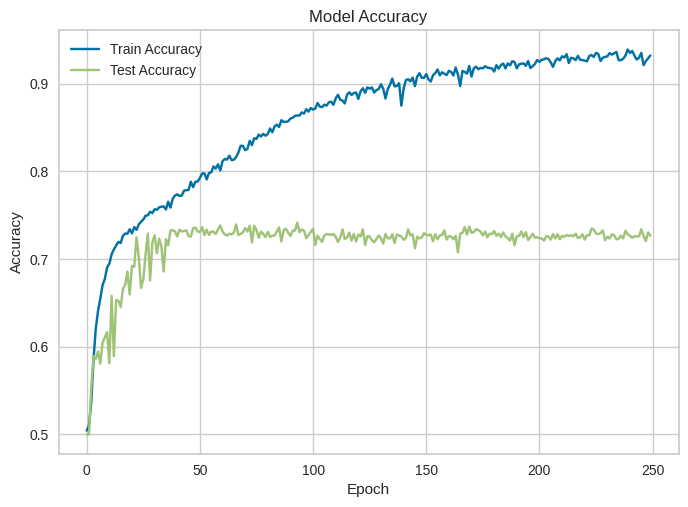

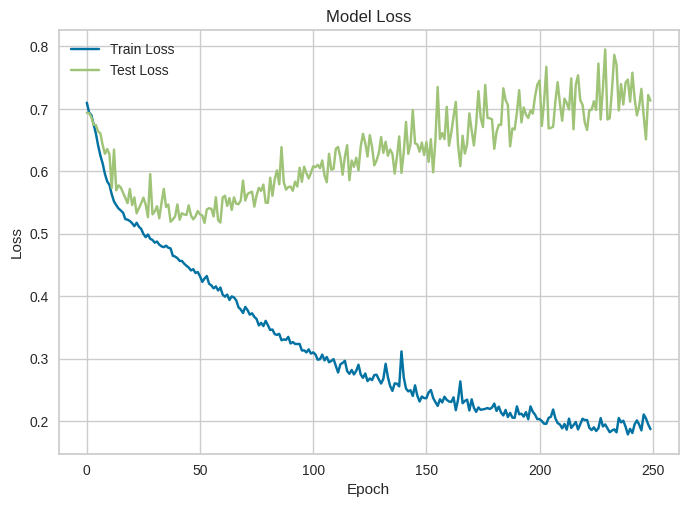

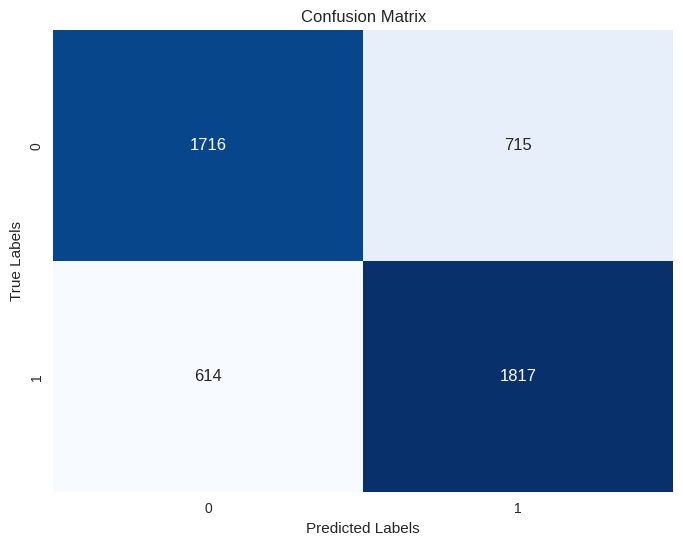

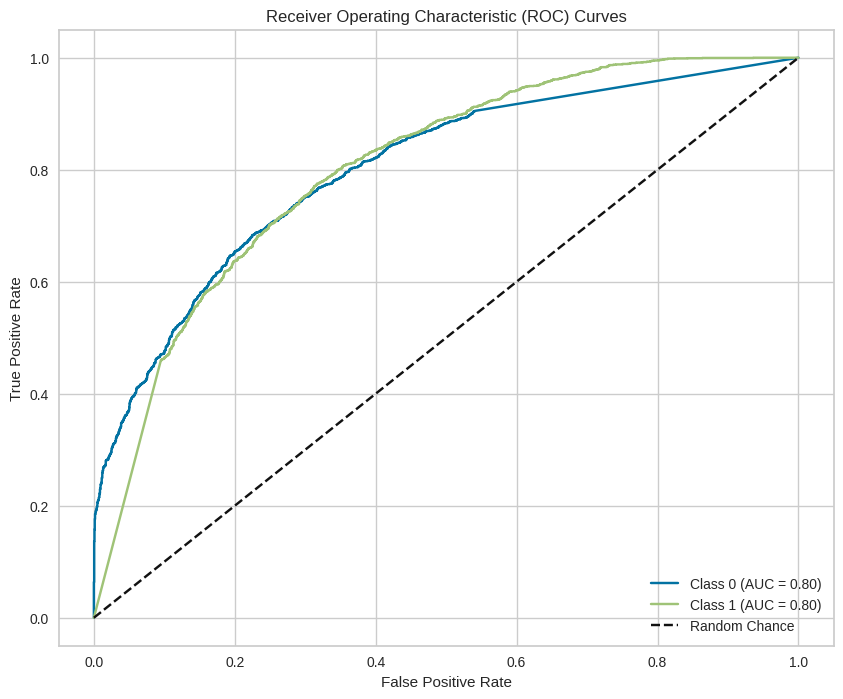

In [ ]:
evaluate_model(model, X_test, y_test, history)

## Transformer 1:1
MEJOR RED!!

In [ ]:

# OPTIMIZER

#Pequeños :3

LEARNING_RATE_2 = 1e-3
WEIGHT_DECAY_2 = 1e-4
LAYER_NORM_EPS_2 = 1e-6


PROJECTION_DIM_2 = 32 # No se puede modificar

#Potencias de 2

NUM_HEADS_2 = 1
NUM_LAYERS_2 = 1

MLP_UNITS_2 = [
    PROJECTION_DIM_2 * 2,
    PROJECTION_DIM_2
]
def mlp(x, dropout_rate, hidden_units):
    # Iterate over the hidden units and
    # add Dense => Dropout.
    for units in hidden_units:
        x = layers.Dense(units, activation=tf.nn.gelu)(x)
        x = layers.Dropout(dropout_rate)(x)
    return x
def transformer_2(encoded_patches):

    x1 = layers.LayerNormalization(epsilon=LAYER_NORM_EPS_2)(encoded_patches)

    # Multi Head Self Attention layer 1.
    attention_output = layers.MultiHeadAttention(
        num_heads=NUM_HEADS_2, key_dim=PROJECTION_DIM_2, dropout=0.1
    )(x1, x1)

    # Skip connection 1.
    x2 = layers.Add()([attention_output, encoded_patches])
    # Layer normalization 2.
    x3 = layers.LayerNormalization(epsilon=LAYER_NORM_EPS_2)(x2)

    # MLP layer 1.
    x4 = mlp(x3, hidden_units=MLP_UNITS_2, dropout_rate=0.1)
    # Skip connection 2.
    encoded_patches = layers.Add()([x4, x2])
    return encoded_patches

def Transform_sh_2(inputs):
      # Iterate over the number of layers and stack up blocks of
      # Transformer.
    for i in range(NUM_LAYERS_2):
          # Add a Transformer block.
        encoded_patches = transformer_2(inputs)

    return encoded_patches

In [ ]:
def FullyConnected():

  inputs = Input(shape=(X_train.shape[1],1), name="input_1")

  x = tf.keras.layers.Conv1D(filters=32, kernel_size=7, strides=1, padding='same')(inputs)
  x = tf.keras.layers.Conv1D(filters=32, kernel_size=7, strides=1, padding='same')(x)
  x = tf.keras.layers.Activation('relu')(x)

  #x = tf.keras.layers.MaxPooling1D(pool_size=2, strides=2)(x)
  #x=  tf.keras.layers.Dropout(rate=0.5)(x)
  #x = tf.keras.layers.Flatten()(x)
  print(x.shape)
  CVT1=Transform_sh_2(x)

  representation = tf.keras.layers.LayerNormalization(epsilon=LAYER_NORM_EPS_2)(CVT1)
  Flat=tf.keras.layers.GlobalMaxPooling1D()(representation)
  #Flat = tf.keras.layers.Flatten()(representation)


  x = tf.keras.layers.Dense(512, activation='relu')(Flat)
  x = tf.keras.layers.Dropout(0.5)(x)

  x = tf.keras.layers.Dense(256, activation='relu')(x)
  x = tf.keras.layers.Dropout(0.5)(x)

  x = tf.keras.layers.Dense(128, activation='relu')(x)
  x = tf.keras.layers.Dropout(0.5)(x)

  x = tf.keras.layers.Dense(64, activation='relu')(x)
  x = tf.keras.layers.Dropout(0.5)(x)

  x = tf.keras.layers.Dense(32, activation='relu')(x)
  x = tf.keras.layers.Dropout(0.5)(x)

  x = tf.keras.layers.Dense(16, activation='relu')(x)
  x = tf.keras.layers.Dropout(0.5)(x)

  x = tf.keras.layers.Dense(12, activation='relu')(x)

  outputs = predictions = Dense(len(classes), activation="softmax", name="output_1")(x)
  model = Model(inputs = inputs, outputs = outputs)
  optimizer=Adam(learning_rate=0.001)
  model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
  return model

In [ ]:
model = FullyConnected()
history = model.fit(X_train, y_train, epochs=250, batch_size=128, validation_data=(X_test, y_test))

(None, 12, 32)
Epoch 1/250
152/152 ━━━━━━━━━━━━━━━━━━━━ 30s 84ms/step - accuracy: 0.4944 - loss: 0.7572 - val_accuracy: 0.5000 - val_loss: 0.6935
Epoch 2/250
152/152 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.5110 - loss: 0.6943 - val_accuracy: 0.5000 - val_loss: 0.6934
Epoch 3/250
152/152 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.5030 - loss: 0.6933 - val_accuracy: 0.5000 - val_loss: 0.6933
Epoch 4/250
152/152 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.5144 - loss: 0.6925 - val_accuracy: 0.5173 - val_loss: 0.6918
Epoch 5/250
152/152 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.5358 - loss: 0.6906 - val_accuracy: 0.5000 - val_loss: 0.6924
Epoch 6/250
152/152 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.5453 - loss: 0.6893 - val_accuracy: 0.5000 - val_loss: 0.6954
Epoch 7/250
152/152 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.5090 - loss: 0.6936 - val_accuracy: 0.5000 - val_loss: 0.6933
Epoch 8/250
152/152 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.5137 - loss: 

152/152 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step
Accuracy: 0.7346770876182641
F1 Score: 0.7325062267562865
Recall: 0.7346770876182641


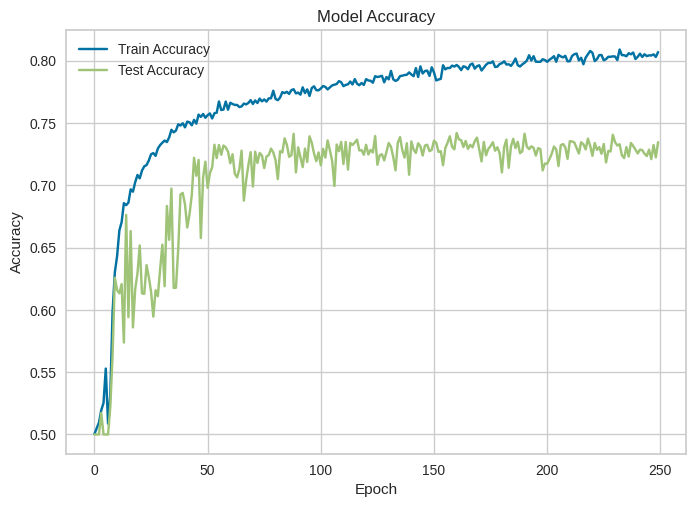

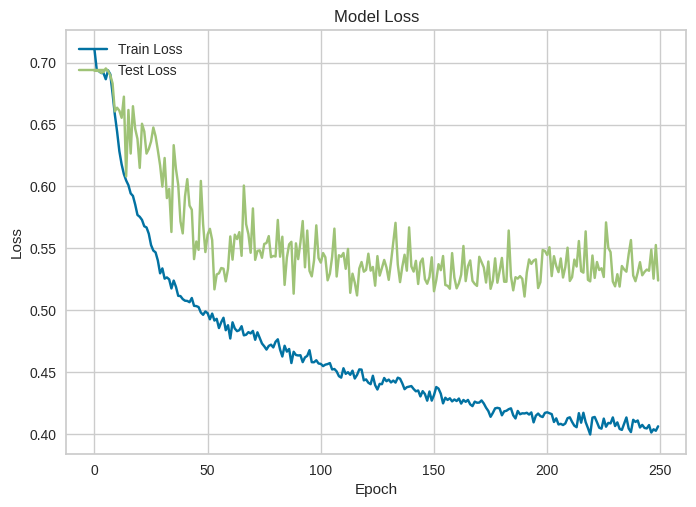

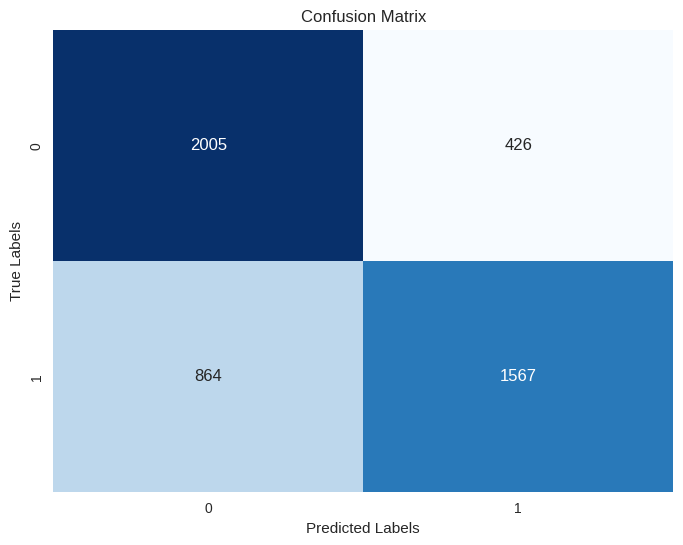

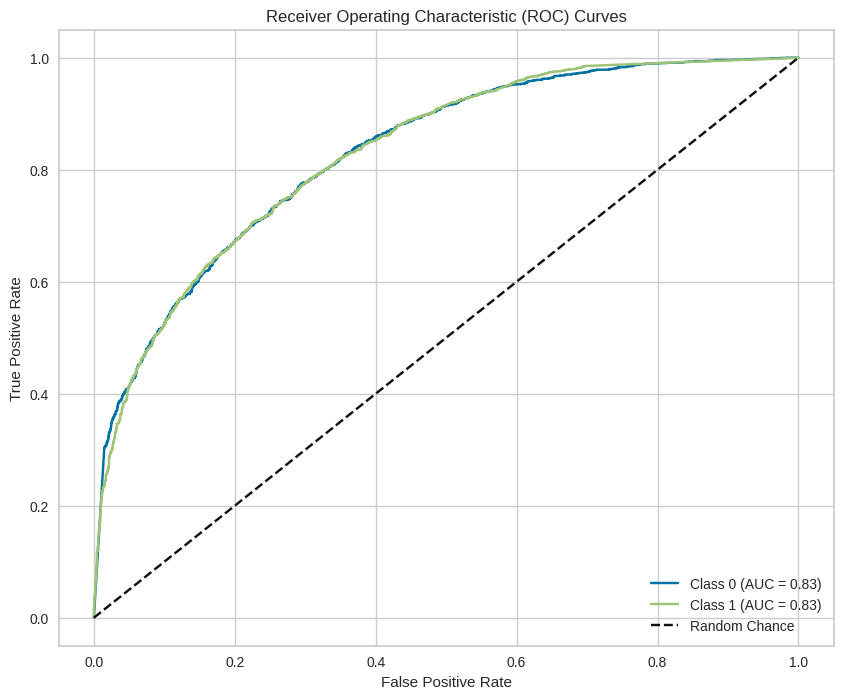

In [ ]:
evaluate_model(model, X_test, y_test, history)

In [ ]:
import numpy as np
# Matriz de confusión
confusion_matrix_values = np.array([
    [2005, 426],
    [864, 1567]
])

# Calcular la matriz de confusión en porcentaje por filas
conf_matrix_percent = confusion_matrix_values.astype('float') / confusion_matrix_values.sum(axis=1)[:, np.newaxis] * 100

# Mostrar la matriz en porcentajes
print(conf_matrix_percent)

[[82.47634718 17.52365282]
 [35.54092966 64.45907034]]


## Transformer 2:2

In [ ]:
# OPTIMIZER

#Pequeños :3

LEARNING_RATE_2 = 1e-3
WEIGHT_DECAY_2 = 1e-4
LAYER_NORM_EPS_2 = 1e-6


PROJECTION_DIM_2 = 32 # No se puede modificar

#Potencias de 2

NUM_HEADS_2 = 2
NUM_LAYERS_2 = 2

MLP_UNITS_2 = [
    PROJECTION_DIM_2 * 2,
    PROJECTION_DIM_2
]
def mlp(x, dropout_rate, hidden_units):
    # Iterate over the hidden units and
    # add Dense => Dropout.
    for units in hidden_units:
        x = layers.Dense(units, activation=tf.nn.gelu)(x)
        x = layers.Dropout(dropout_rate)(x)
    return x
def transformer_2(encoded_patches):

    x1 = layers.LayerNormalization(epsilon=LAYER_NORM_EPS_2)(encoded_patches)

    # Multi Head Self Attention layer 1.
    attention_output = layers.MultiHeadAttention(
        num_heads=NUM_HEADS_2, key_dim=PROJECTION_DIM_2, dropout=0.1
    )(x1, x1)

    # Skip connection 1.
    x2 = layers.Add()([attention_output, encoded_patches])
    # Layer normalization 2.
    x3 = layers.LayerNormalization(epsilon=LAYER_NORM_EPS_2)(x2)

    # MLP layer 1.
    x4 = mlp(x3, hidden_units=MLP_UNITS_2, dropout_rate=0.1)
    # Skip connection 2.
    encoded_patches = layers.Add()([x4, x2])
    return encoded_patches

def Transform_sh_2(inputs):
      # Iterate over the number of layers and stack up blocks of
      # Transformer.
    for i in range(NUM_LAYERS_2):
          # Add a Transformer block.
        encoded_patches = transformer_2(inputs)

    return encoded_patches

In [ ]:
def FullyConnected():

  inputs = Input(shape=(X_train.shape[1],1), name="input_1")

  x = tf.keras.layers.Conv1D(filters=32, kernel_size=7, strides=1, padding='same')(inputs)
  x = tf.keras.layers.Conv1D(filters=32, kernel_size=7, strides=1, padding='same')(x)
  x = tf.keras.layers.Activation('relu')(x)

  #x = tf.keras.layers.MaxPooling1D(pool_size=2, strides=2)(x)
  #x=  tf.keras.layers.Dropout(rate=0.5)(x)
  #x = tf.keras.layers.Flatten()(x)
  print(x.shape)
  CVT1=Transform_sh_2(x)

  representation = tf.keras.layers.LayerNormalization(epsilon=LAYER_NORM_EPS_2)(CVT1)
  Flat=tf.keras.layers.GlobalMaxPooling1D()(representation)
  #Flat = tf.keras.layers.Flatten()(representation)


  x = tf.keras.layers.Dense(512, activation='relu')(Flat)
  x = tf.keras.layers.Dropout(0.5)(x)

  x = tf.keras.layers.Dense(256, activation='relu')(x)
  x = tf.keras.layers.Dropout(0.5)(x)

  x = tf.keras.layers.Dense(128, activation='relu')(x)
  x = tf.keras.layers.Dropout(0.5)(x)

  x = tf.keras.layers.Dense(64, activation='relu')(x)
  x = tf.keras.layers.Dropout(0.5)(x)

  x = tf.keras.layers.Dense(32, activation='relu')(x)
  x = tf.keras.layers.Dropout(0.5)(x)

  x = tf.keras.layers.Dense(16, activation='relu')(x)
  x = tf.keras.layers.Dropout(0.5)(x)

  x = tf.keras.layers.Dense(12, activation='relu')(x)

  outputs = predictions = Dense(len(classes), activation="softmax", name="output_1")(x)
  model = Model(inputs = inputs, outputs = outputs)
  optimizer=Adam(learning_rate=0.001)
  model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
  return model

In [ ]:
model = FullyConnected()
history = model.fit(X_train, y_train, epochs=250, batch_size=128, validation_data=(X_test, y_test))

(None, 12, 32)
Epoch 1/250
152/152 ━━━━━━━━━━━━━━━━━━━━ 26s 75ms/step - accuracy: 0.5044 - loss: 0.7104 - val_accuracy: 0.5294 - val_loss: 0.6931
Epoch 2/250
152/152 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.4929 - loss: 0.6951 - val_accuracy: 0.5000 - val_loss: 0.6932
Epoch 3/250
152/152 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.4997 - loss: 0.6937 - val_accuracy: 0.5000 - val_loss: 0.6932
Epoch 4/250
152/152 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.4940 - loss: 0.6939 - val_accuracy: 0.5000 - val_loss: 0.6932
Epoch 5/250
152/152 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.5038 - loss: 0.6933 - val_accuracy: 0.5000 - val_loss: 0.6932
Epoch 6/250
152/152 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.5037 - loss: 0.6938 - val_accuracy: 0.5000 - val_loss: 0.6932
Epoch 7/250
152/152 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.4972 - loss: 0.6935 - val_accuracy: 0.5000 - val_loss: 0.6932
Epoch 8/250
152/152 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.5029 - loss: 

152/152 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step
Accuracy: 0.7178116001645414
F1 Score: 0.7105518389540567
Recall: 0.7178116001645414


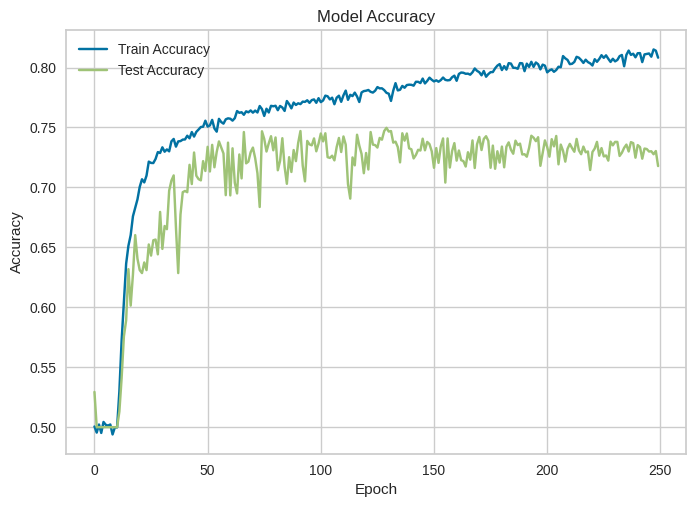

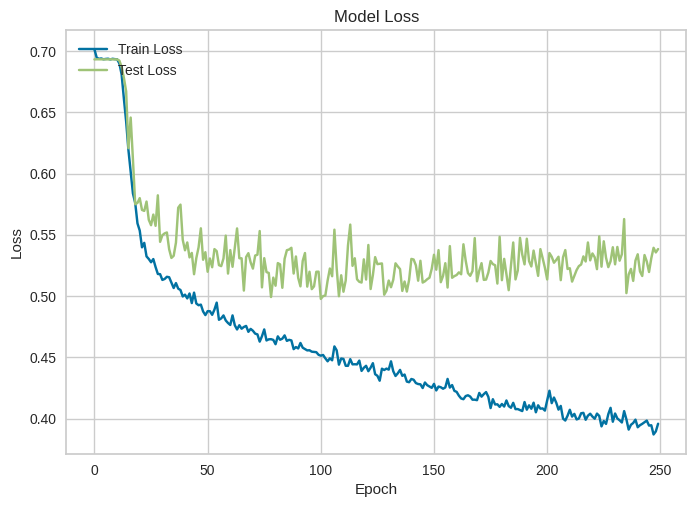

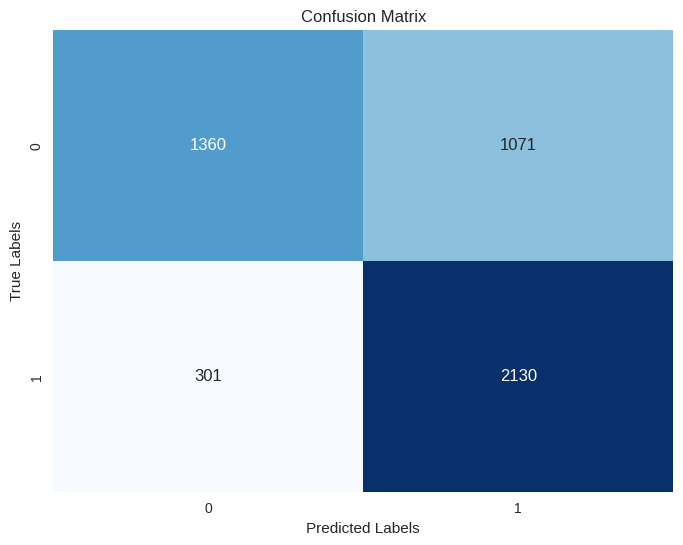

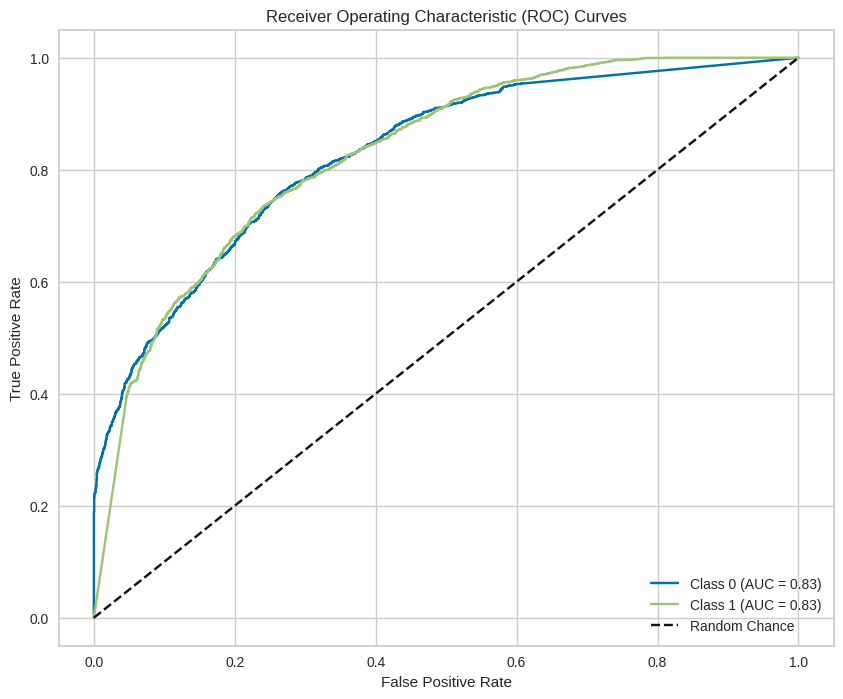

In [ ]:
evaluate_model(model, X_test, y_test, history)

##Transformer 4:4

In [ ]:
# OPTIMIZER

#Pequeños :3

LEARNING_RATE_2 = 1e-3
WEIGHT_DECAY_2 = 1e-4
LAYER_NORM_EPS_2 = 1e-6


PROJECTION_DIM_2 = 32 # No se puede modificar

#Potencias de 2

NUM_HEADS_2 = 4
NUM_LAYERS_2 = 4

MLP_UNITS_2 = [
    PROJECTION_DIM_2 * 2,
    PROJECTION_DIM_2
]
def mlp(x, dropout_rate, hidden_units):
    # Iterate over the hidden units and
    # add Dense => Dropout.
    for units in hidden_units:
        x = layers.Dense(units, activation=tf.nn.gelu)(x)
        x = layers.Dropout(dropout_rate)(x)
    return x
def transformer_2(encoded_patches):

    x1 = layers.LayerNormalization(epsilon=LAYER_NORM_EPS_2)(encoded_patches)

    # Multi Head Self Attention layer 1.
    attention_output = layers.MultiHeadAttention(
        num_heads=NUM_HEADS_2, key_dim=PROJECTION_DIM_2, dropout=0.1
    )(x1, x1)

    # Skip connection 1.
    x2 = layers.Add()([attention_output, encoded_patches])
    # Layer normalization 2.
    x3 = layers.LayerNormalization(epsilon=LAYER_NORM_EPS_2)(x2)

    # MLP layer 1.
    x4 = mlp(x3, hidden_units=MLP_UNITS_2, dropout_rate=0.1)
    # Skip connection 2.
    encoded_patches = layers.Add()([x4, x2])
    return encoded_patches

def Transform_sh_2(inputs):
      # Iterate over the number of layers and stack up blocks of
      # Transformer.
    for i in range(NUM_LAYERS_2):
          # Add a Transformer block.
        encoded_patches = transformer_2(inputs)

    return encoded_patches

In [ ]:
def FullyConnected():

  inputs = Input(shape=(X_train.shape[1],1), name="input_1")

  x = tf.keras.layers.Conv1D(filters=32, kernel_size=7, strides=1, padding='same')(inputs)
  x = tf.keras.layers.Conv1D(filters=32, kernel_size=7, strides=1, padding='same')(x)
  x = tf.keras.layers.Activation('relu')(x)

  #x = tf.keras.layers.MaxPooling1D(pool_size=2, strides=2)(x)
  #x=  tf.keras.layers.Dropout(rate=0.5)(x)
  #x = tf.keras.layers.Flatten()(x)
  print(x.shape)
  CVT1=Transform_sh_2(x)

  representation = tf.keras.layers.LayerNormalization(epsilon=LAYER_NORM_EPS_2)(CVT1)
  Flat=tf.keras.layers.GlobalMaxPooling1D()(representation)
  #Flat = tf.keras.layers.Flatten()(representation)


  x = tf.keras.layers.Dense(512, activation='relu')(Flat)
  x = tf.keras.layers.Dropout(0.5)(x)

  x = tf.keras.layers.Dense(256, activation='relu')(x)
  x = tf.keras.layers.Dropout(0.5)(x)

  x = tf.keras.layers.Dense(128, activation='relu')(x)
  x = tf.keras.layers.Dropout(0.5)(x)

  x = tf.keras.layers.Dense(64, activation='relu')(x)
  x = tf.keras.layers.Dropout(0.5)(x)

  x = tf.keras.layers.Dense(32, activation='relu')(x)
  x = tf.keras.layers.Dropout(0.5)(x)

  x = tf.keras.layers.Dense(16, activation='relu')(x)
  x = tf.keras.layers.Dropout(0.5)(x)

  x = tf.keras.layers.Dense(12, activation='relu')(x)

  outputs = predictions = Dense(len(classes), activation="softmax", name="output_1")(x)
  model = Model(inputs = inputs, outputs = outputs)
  optimizer=Adam(learning_rate=0.001)
  model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
  return model

In [ ]:
model = FullyConnected()
history = model.fit(X_train, y_train, epochs=250, batch_size=128, validation_data=(X_test, y_test))

(None, 12, 32)
Epoch 1/250
152/152 ━━━━━━━━━━━━━━━━━━━━ 25s 76ms/step - accuracy: 0.5040 - loss: 0.7656 - val_accuracy: 0.5000 - val_loss: 0.6937
Epoch 2/250
152/152 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.5028 - loss: 0.6945 - val_accuracy: 0.5000 - val_loss: 0.6935
Epoch 3/250
152/152 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.5035 - loss: 0.6940 - val_accuracy: 0.5000 - val_loss: 0.6933
Epoch 4/250
152/152 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.5016 - loss: 0.6942 - val_accuracy: 0.5000 - val_loss: 0.6933
Epoch 5/250
152/152 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.5115 - loss: 0.6934 - val_accuracy: 0.5000 - val_loss: 0.6930
Epoch 6/250
152/152 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.5123 - loss: 0.6931 - val_accuracy: 0.5000 - val_loss: 0.6933
Epoch 7/250
152/152 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.5406 - loss: 0.6893 - val_accuracy: 0.5284 - val_loss: 0.6884
Epoch 8/250
152/152 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.5819 - loss: 

152/152 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step
Accuracy: 0.716166186754422
F1 Score: 0.7124598338757385
Recall: 0.716166186754422


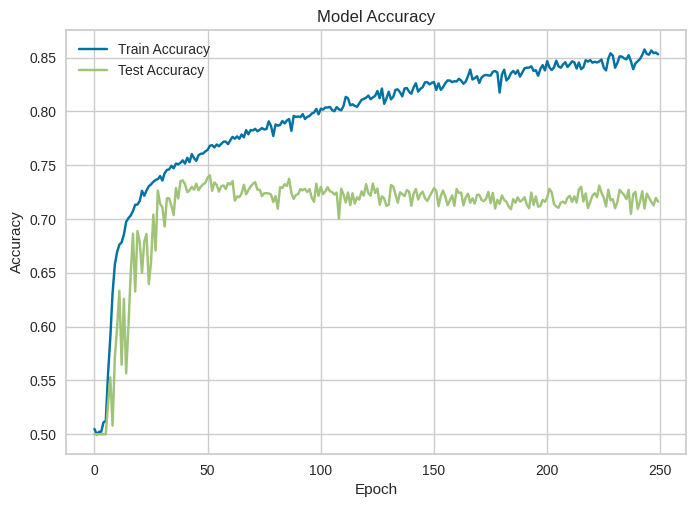

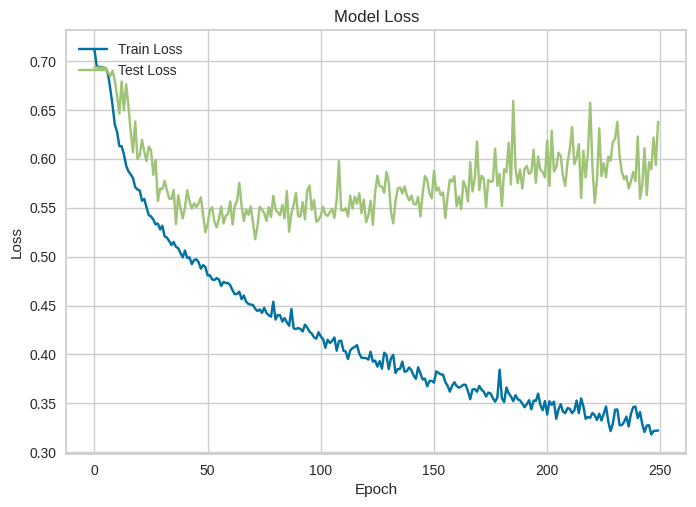

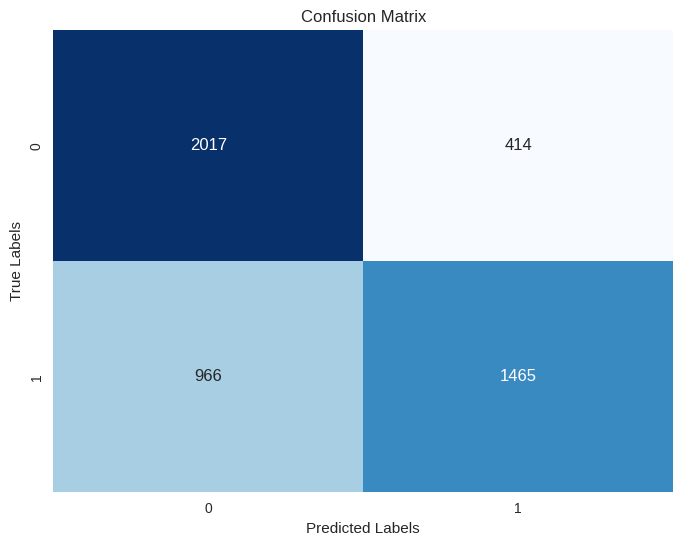

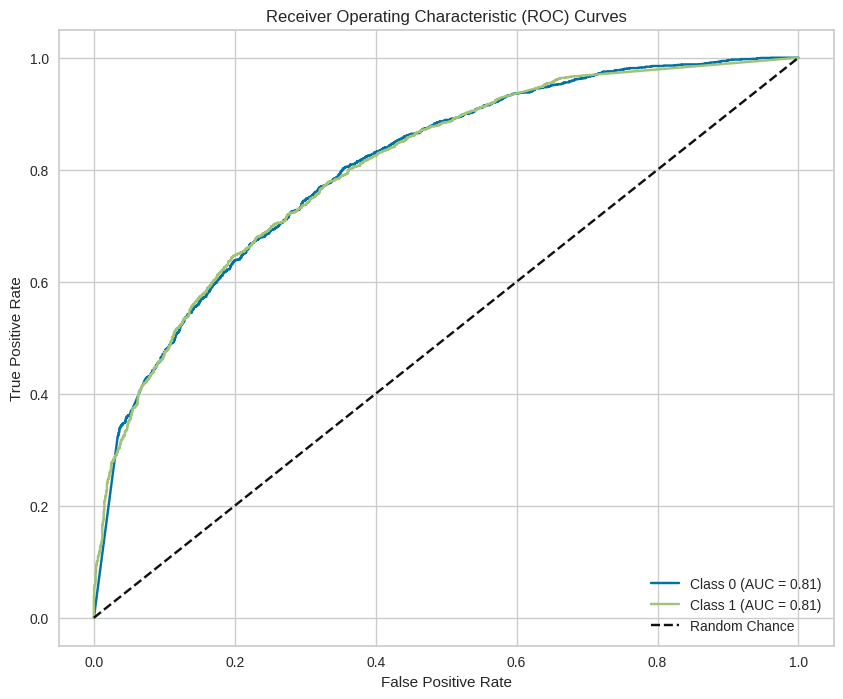

In [ ]:
evaluate_model(model, X_test, y_test, history)

##Transformer 8:8

In [ ]:
# OPTIMIZER

#Pequeños :3

LEARNING_RATE_2 = 1e-3
WEIGHT_DECAY_2 = 1e-4
LAYER_NORM_EPS_2 = 1e-6


PROJECTION_DIM_2 = 32 # No se puede modificar

#Potencias de 2

NUM_HEADS_2 = 8
NUM_LAYERS_2 = 8

MLP_UNITS_2 = [
    PROJECTION_DIM_2 * 2,
    PROJECTION_DIM_2
]
def mlp(x, dropout_rate, hidden_units):
    # Iterate over the hidden units and
    # add Dense => Dropout.
    for units in hidden_units:
        x = layers.Dense(units, activation=tf.nn.gelu)(x)
        x = layers.Dropout(dropout_rate)(x)
    return x
def transformer_2(encoded_patches):

    x1 = layers.LayerNormalization(epsilon=LAYER_NORM_EPS_2)(encoded_patches)

    # Multi Head Self Attention layer 1.
    attention_output = layers.MultiHeadAttention(
        num_heads=NUM_HEADS_2, key_dim=PROJECTION_DIM_2, dropout=0.1
    )(x1, x1)

    # Skip connection 1.
    x2 = layers.Add()([attention_output, encoded_patches])
    # Layer normalization 2.
    x3 = layers.LayerNormalization(epsilon=LAYER_NORM_EPS_2)(x2)

    # MLP layer 1.
    x4 = mlp(x3, hidden_units=MLP_UNITS_2, dropout_rate=0.1)
    # Skip connection 2.
    encoded_patches = layers.Add()([x4, x2])
    return encoded_patches

def Transform_sh_2(inputs):
      # Iterate over the number of layers and stack up blocks of
      # Transformer.
    for i in range(NUM_LAYERS_2):
          # Add a Transformer block.
        encoded_patches = transformer_2(inputs)

    return encoded_patches

In [ ]:
def FullyConnected():

  inputs = Input(shape=(X_train.shape[1],1), name="input_1")

  x = tf.keras.layers.Conv1D(filters=32, kernel_size=7, strides=1, padding='same')(inputs)
  x = tf.keras.layers.Conv1D(filters=32, kernel_size=7, strides=1, padding='same')(x)
  x = tf.keras.layers.Activation('relu')(x)

  #x = tf.keras.layers.MaxPooling1D(pool_size=2, strides=2)(x)
  #x=  tf.keras.layers.Dropout(rate=0.5)(x)
  #x = tf.keras.layers.Flatten()(x)
  print(x.shape)
  CVT1=Transform_sh_2(x)

  representation = tf.keras.layers.LayerNormalization(epsilon=LAYER_NORM_EPS_2)(CVT1)
  Flat=tf.keras.layers.GlobalMaxPooling1D()(representation)
  #Flat = tf.keras.layers.Flatten()(representation)


  x = tf.keras.layers.Dense(512, activation='relu')(Flat)
  x = tf.keras.layers.Dropout(0.5)(x)

  x = tf.keras.layers.Dense(256, activation='relu')(x)
  x = tf.keras.layers.Dropout(0.5)(x)

  x = tf.keras.layers.Dense(128, activation='relu')(x)
  x = tf.keras.layers.Dropout(0.5)(x)

  x = tf.keras.layers.Dense(64, activation='relu')(x)
  x = tf.keras.layers.Dropout(0.5)(x)

  x = tf.keras.layers.Dense(32, activation='relu')(x)
  x = tf.keras.layers.Dropout(0.5)(x)

  x = tf.keras.layers.Dense(16, activation='relu')(x)
  x = tf.keras.layers.Dropout(0.5)(x)

  x = tf.keras.layers.Dense(12, activation='relu')(x)

  outputs = predictions = Dense(len(classes), activation="softmax", name="output_1")(x)
  model = Model(inputs = inputs, outputs = outputs)
  optimizer=Adam(learning_rate=0.001)
  model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
  return model

In [ ]:
model = FullyConnected()
history = model.fit(X_train, y_train, epochs=250, batch_size=128, validation_data=(X_test, y_test))

(None, 12, 32)
Epoch 1/250
152/152 ━━━━━━━━━━━━━━━━━━━━ 26s 76ms/step - accuracy: 0.4923 - loss: 0.7066 - val_accuracy: 0.5002 - val_loss: 0.6932
Epoch 2/250
152/152 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.4979 - loss: 0.6943 - val_accuracy: 0.5000 - val_loss: 0.6932
Epoch 3/250
152/152 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.4972 - loss: 0.6944 - val_accuracy: 0.5000 - val_loss: 0.6931
Epoch 4/250
152/152 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.5061 - loss: 0.6931 - val_accuracy: 0.5000 - val_loss: 0.6932
Epoch 5/250
152/152 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.4997 - loss: 0.6933 - val_accuracy: 0.5000 - val_loss: 0.6931
Epoch 6/250
152/152 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.5055 - loss: 0.6932 - val_accuracy: 0.5035 - val_loss: 0.6928
Epoch 7/250
152/152 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.4990 - loss: 0.6934 - val_accuracy: 0.5051 - val_loss: 0.6926
Epoch 8/250
152/152 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.5455 - loss: 

152/152 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step
Accuracy: 0.7256273138626079
F1 Score: 0.7235247067385052
Recall: 0.7256273138626079


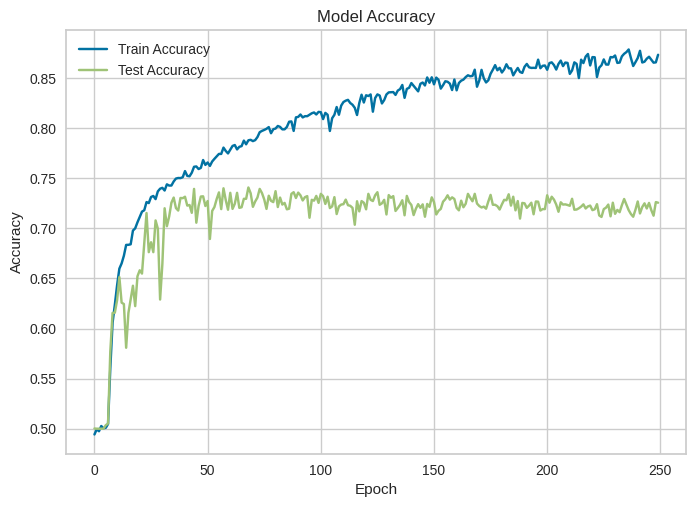

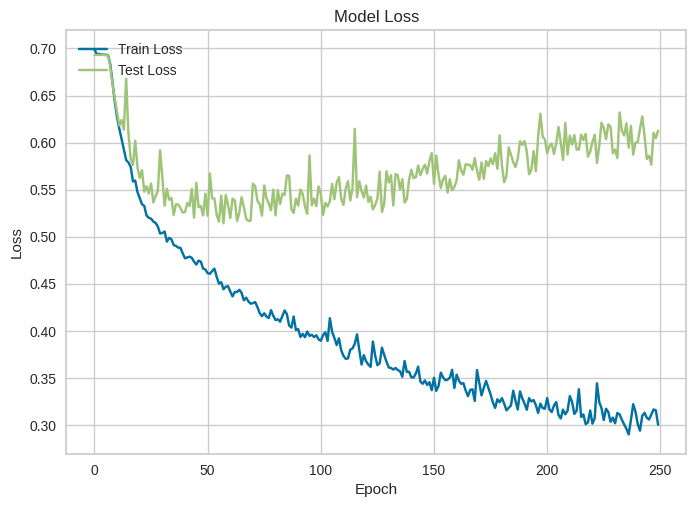

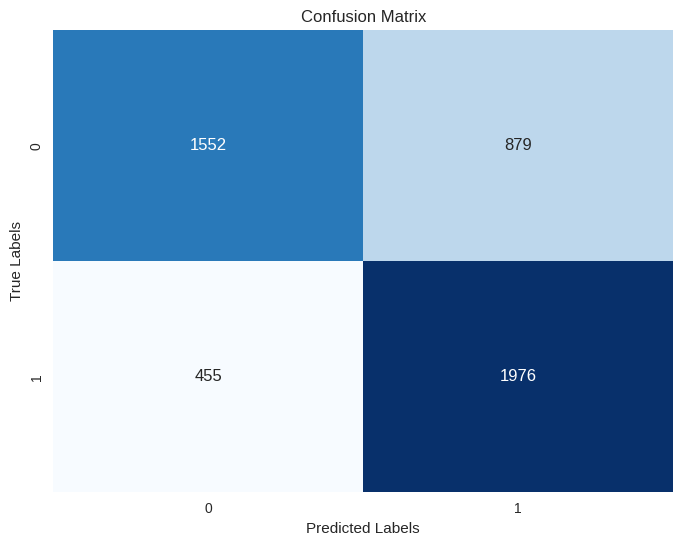

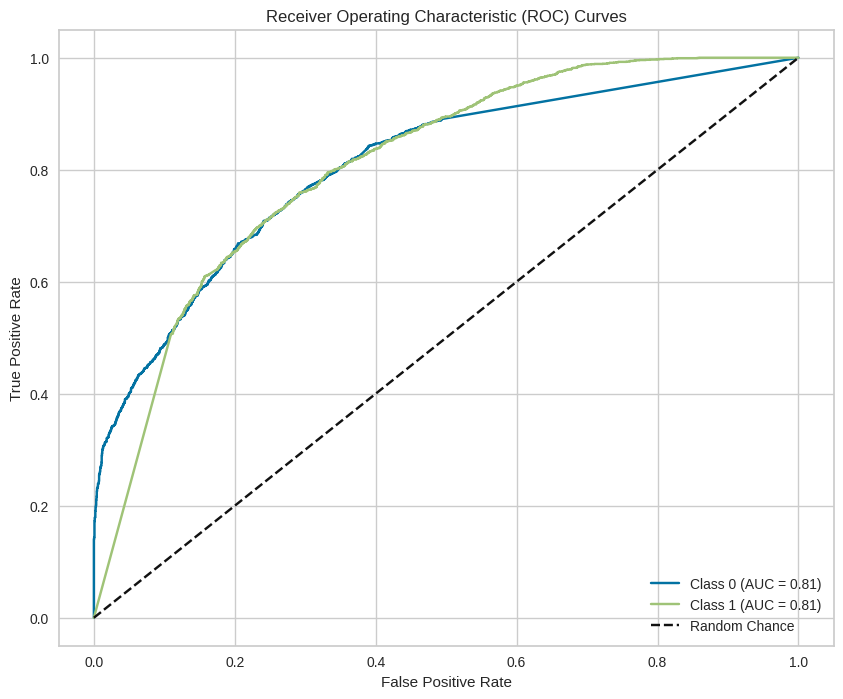

In [ ]:
evaluate_model(model, X_test, y_test, history)

##Transformer 16:16

In [ ]:
# OPTIMIZER

#Pequeños :3

LEARNING_RATE_2 = 1e-3
WEIGHT_DECAY_2 = 1e-4
LAYER_NORM_EPS_2 = 1e-6


PROJECTION_DIM_2 = 32 # No se puede modificar

#Potencias de 2

NUM_HEADS_2 = 16
NUM_LAYERS_2 = 16

MLP_UNITS_2 = [
    PROJECTION_DIM_2 * 2,
    PROJECTION_DIM_2
]
def mlp(x, dropout_rate, hidden_units):
    # Iterate over the hidden units and
    # add Dense => Dropout.
    for units in hidden_units:
        x = layers.Dense(units, activation=tf.nn.gelu)(x)
        x = layers.Dropout(dropout_rate)(x)
    return x
def transformer_2(encoded_patches):

    x1 = layers.LayerNormalization(epsilon=LAYER_NORM_EPS_2)(encoded_patches)

    # Multi Head Self Attention layer 1.
    attention_output = layers.MultiHeadAttention(
        num_heads=NUM_HEADS_2, key_dim=PROJECTION_DIM_2, dropout=0.1
    )(x1, x1)

    # Skip connection 1.
    x2 = layers.Add()([attention_output, encoded_patches])
    # Layer normalization 2.
    x3 = layers.LayerNormalization(epsilon=LAYER_NORM_EPS_2)(x2)

    # MLP layer 1.
    x4 = mlp(x3, hidden_units=MLP_UNITS_2, dropout_rate=0.1)
    # Skip connection 2.
    encoded_patches = layers.Add()([x4, x2])
    return encoded_patches

def Transform_sh_2(inputs):
      # Iterate over the number of layers and stack up blocks of
      # Transformer.
    for i in range(NUM_LAYERS_2):
          # Add a Transformer block.
        encoded_patches = transformer_2(inputs)

    return encoded_patches

In [ ]:
def FullyConnected():

  inputs = Input(shape=(X_train.shape[1],1), name="input_1")

  x = tf.keras.layers.Conv1D(filters=32, kernel_size=7, strides=1, padding='same')(inputs)
  x = tf.keras.layers.Conv1D(filters=32, kernel_size=7, strides=1, padding='same')(x)
  x = tf.keras.layers.Activation('relu')(x)

  #x = tf.keras.layers.MaxPooling1D(pool_size=2, strides=2)(x)
  #x=  tf.keras.layers.Dropout(rate=0.5)(x)
  #x = tf.keras.layers.Flatten()(x)
  print(x.shape)
  CVT1=Transform_sh_2(x)

  representation = tf.keras.layers.LayerNormalization(epsilon=LAYER_NORM_EPS_2)(CVT1)
  Flat=tf.keras.layers.GlobalMaxPooling1D()(representation)
  #Flat = tf.keras.layers.Flatten()(representation)


  x = tf.keras.layers.Dense(512, activation='relu')(Flat)
  x = tf.keras.layers.Dropout(0.5)(x)

  x = tf.keras.layers.Dense(256, activation='relu')(x)
  x = tf.keras.layers.Dropout(0.5)(x)

  x = tf.keras.layers.Dense(128, activation='relu')(x)
  x = tf.keras.layers.Dropout(0.5)(x)

  x = tf.keras.layers.Dense(64, activation='relu')(x)
  x = tf.keras.layers.Dropout(0.5)(x)

  x = tf.keras.layers.Dense(32, activation='relu')(x)
  x = tf.keras.layers.Dropout(0.5)(x)

  x = tf.keras.layers.Dense(16, activation='relu')(x)
  x = tf.keras.layers.Dropout(0.5)(x)

  x = tf.keras.layers.Dense(12, activation='relu')(x)

  outputs = predictions = Dense(len(classes), activation="softmax", name="output_1")(x)
  model = Model(inputs = inputs, outputs = outputs)
  optimizer=Adam(learning_rate=0.001)
  model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
  return model

In [ ]:
model = FullyConnected()
history = model.fit(X_train, y_train, epochs=250, batch_size=128, validation_data=(X_test, y_test))

(None, 12, 32)
Epoch 1/250
152/152 ━━━━━━━━━━━━━━━━━━━━ 26s 77ms/step - accuracy: 0.5005 - loss: 0.7354 - val_accuracy: 0.5082 - val_loss: 0.6931
Epoch 2/250
152/152 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.5030 - loss: 0.6955 - val_accuracy: 0.5000 - val_loss: 0.6932
Epoch 3/250
152/152 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.5110 - loss: 0.6935 - val_accuracy: 0.5000 - val_loss: 0.6931
Epoch 4/250
152/152 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.4985 - loss: 0.6939 - val_accuracy: 0.5000 - val_loss: 0.6932
Epoch 5/250
152/152 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.4957 - loss: 0.6939 - val_accuracy: 0.5000 - val_loss: 0.6931
Epoch 6/250
152/152 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.5025 - loss: 0.6935 - val_accuracy: 0.5000 - val_loss: 0.6932
Epoch 7/250
152/152 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.5059 - loss: 0.6928 - val_accuracy: 0.5000 - val_loss: 0.6934
Epoch 8/250
152/152 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.5208 - loss: 

152/152 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step
Accuracy: 0.7237762237762237
F1 Score: 0.7221933552314028
Recall: 0.7237762237762237


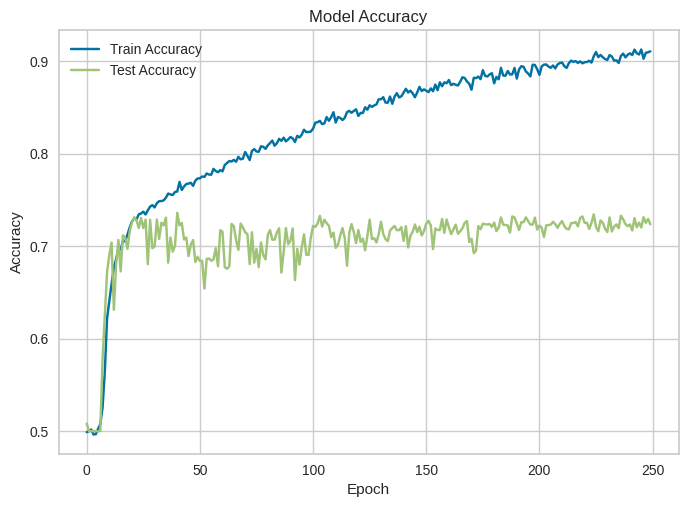

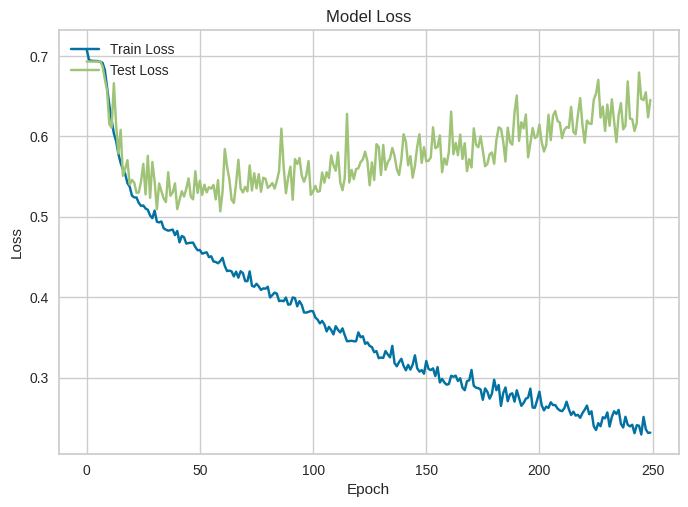

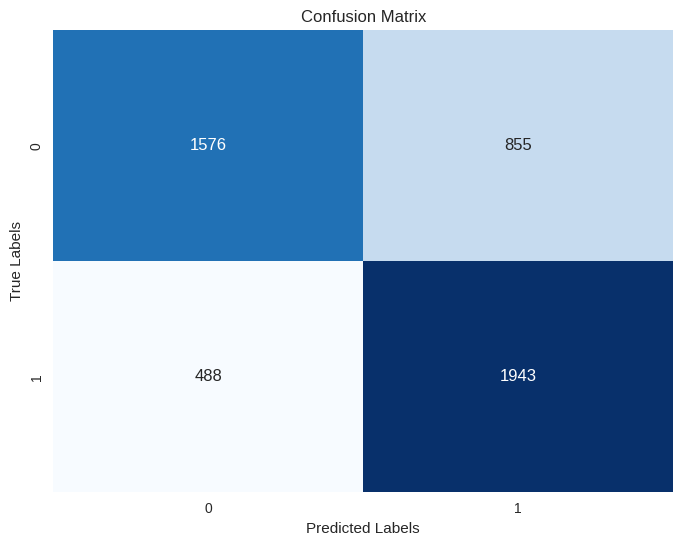

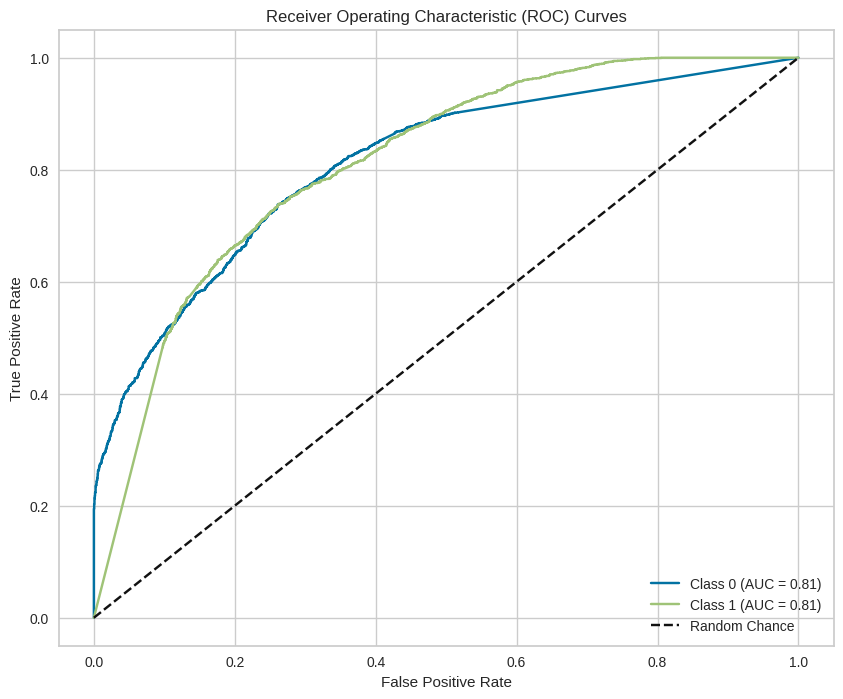

In [ ]:
evaluate_model(model, X_test, y_test, history)